In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
# Imports
library(alakazam)
library(shazam)
library(ggplot2)

In [15]:
%%R
# Read in database file
db <- readChangeoDb("SRR765688_db-pass_FUNCTIONAL-T.tab")

In [16]:
%%R
names(db)

 [1] "SEQUENCE_ID"        "SEQUENCE_INPUT"     "FUNCTIONAL"        
 [4] "IN_FRAME"           "STOP"               "MUTATED_INVARIANT" 
 [7] "INDELS"             "V_CALL"             "D_CALL"            
[10] "J_CALL"             "SEQUENCE_VDJ"       "SEQUENCE_IMGT"     
[13] "V_SEQ_START"        "V_SEQ_LENGTH"       "V_GERM_START_VDJ"  
[16] "V_GERM_LENGTH_VDJ"  "V_GERM_START_IMGT"  "V_GERM_LENGTH_IMGT"
[19] "NP1_LENGTH"         "D_SEQ_START"        "D_SEQ_LENGTH"      
[22] "D_GERM_START"       "D_GERM_LENGTH"      "NP2_LENGTH"        
[25] "J_SEQ_START"        "J_SEQ_LENGTH"       "J_GERM_START"      
[28] "J_GERM_LENGTH"      "JUNCTION_LENGTH"    "JUNCTION"          
[31] "V_SCORE"            "V_IDENTITY"         "V_EVALUE"          
[34] "V_BTOP"             "J_SCORE"            "J_IDENTITY"        
[37] "J_EVALUE"           "J_BTOP"             "HMM_SCORE"         
[40] "FWR1_IMGT"          "FWR2_IMGT"          "FWR3_IMGT"         
[43] "FWR4_IMGT"          "CDR1_IMGT"          "

In [ ]:
%%R
vdjdb <- data.frame(count=db$DUPCOUNT,frequency=db$DUPCOUNT/sum(db$DUPCOUNT),CDR3nt=db$CDR3_IMGT,CDR3aa=,V=db$V_CALL,D=db$D_CALL,J=db$J_CALL,)

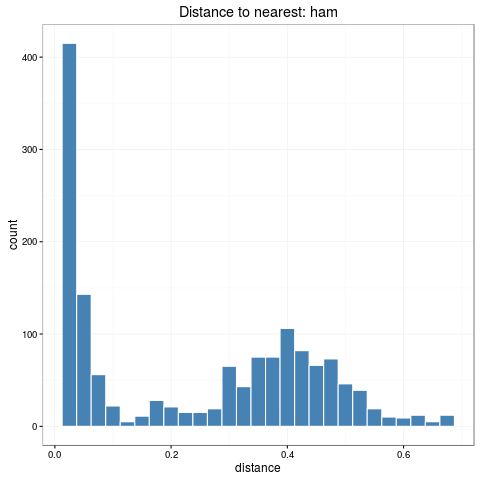

In [17]:
%%R
# Calculate distance to nearest neighbor
db <- distToNearest(db, model="ham", symmetry="min")
# Plot resulting histogram with vertical threshold line
p1 <- ggplot() + theme_bw() + 
    ggtitle("Distance to nearest: ham") + xlab("distance") +
    geom_histogram(data=db, aes(x=DIST_NEAREST), binwidth=0.025, 
                   fill="steelblue", color="white")
plot(p1)

In [18]:
%%bash
DefineClones.py bygroup -d SRR765688_db-pass_FUNCTIONAL-T.tab --act set --model ham \
--sym min --norm len --dist 0.20

     START> DefineClones
   DB_FILE> SRR765688_db-pass_FUNCTIONAL-T.tab
GROUP_FUNC> indexJunctions
GROUP_ARGS> {'fields': None, 'action': 'set', 'mode': 'gene'}
CLONE_FUNC> distanceClones
CLONE_ARGS> {'distance': 0.2, 'sym': 'min', 'norm': 'len', 'model': 'ham', 'seq_field': 'JUNCTION', 'linkage': 'single'}
     NPROC> 4

PROGRESS> Grouping sequences
PROGRESS> 07:56:01 (1972) 0.0 min

PROGRESS> Assigning clones
PROGRESS> 07:56:02 [####################] 100% (1,972) 0.0 min

 OUTPUT> SRR765688_db-pass_FUNCTIONAL-T_clone-pass.tab
 CLONES> 1110
RECORDS> 1972
   PASS> 1972
   FAIL> 0
    END> DefineClones



In [21]:
%%R
# Read in database file
clones <- readChangeoDb("SRR765688_db-pass_FUNCTIONAL-T_clone-pass.tab")

In [30]:
%%R
sort(table(clones$CLONE),decreasing=TRUE)


 899  317  839  933  503  126  639  642  100  775  350  366  584  523  808  105 
  61   48   29   25   22   20   20   20   16   16   14   13   13   12   12   11 
 794  509 1077  185  664  889  370  425  527  712  737  101  127  670  102  373 
  11   10    9    9    9    9    8    8    8    8    8    7    7    7    6    6 
 452  502  551  577  953 1037  104    2  243  266  365  451  615  617  625  679 
   6    6    6    6    6    5    5    5    5    5    5    5    5    5    5    5 
 684  716  812  842  844  874  932  968  103 1051  106  109  111  119  157  285 
   5    5    5    5    5    5    5    5    4    4    4    4    4    4    4    4 
 346  352  386  408  470  511  548  549  565  654  655  672  690  777  860  862 
   4    4    4    4    4    4    4    4    4    4    4    4    4    4    4    4 
 951  961    1 1018 1068  117  131  165  218   23  269  273  298  335  378  392 
   4    4    3    3    3    3    3    3    3    3    3    3    3    3    3    3 
 414  419  440  448  483  4

In [32]:
%%R
clone899 <- clones[clones$CLONE==899,]
clone899

                                    SEQUENCE_ID
1600  SRR765688.57924 HQP9GKT01C5VBY length=404
1601 SRR765688.113784 HQP9GKT01DEZ30 length=404
1602  SRR765688.83150 HQP9GKT01CT7UX length=404
1603 SRR765688.263493 HQP9GKT02IQ6K4 length=404
1604  SRR765688.82439 HQP9GKT01C2NJ9 length=399
1605  SRR765688.72400 HQP9GKT01EIC51 length=394
1606  SRR765688.60679 HQP9GKT01AE7T4 length=404
1607  SRR765688.96180 HQP9GKT01BTGR5 length=404
1608 SRR765688.115276 HQP9GKT01CAVBE length=404
1609  SRR765688.87384 HQP9GKT01BLZXR length=404
1610 SRR765688.103131 HQP9GKT01DBKPZ length=404
1611  SRR765688.43246 HQP9GKT01BAMTB length=385
1612 SRR765688.142476 HQP9GKT01AHEOS length=404
1613  SRR765688.40846 HQP9GKT01A91P3 length=404
1614 SRR765688.115056 HQP9GKT01DF354 length=404
1615  SRR765688.87224 HQP9GKT01C799L length=404
1616 SRR765688.105426 HQP9GKT01EGUVX length=404
1617  SRR765688.33811 HQP9GKT01AZ9Y4 length=404
1618 SRR765688.104243 HQP9GKT01DLMD7 length=404
1619  SRR765688.95069 HQP9GKT01BW35H len